# <h1> Time Series Forecasting using prophet </h1>

Dataset: https://www.kaggle.com/aditya230688/jhts-forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import metrics_computation
from model import prophet_predictor

import warnings
warnings.filterwarnings('ignore')

C:\Users\hotsa\anaconda3\envs\timeseries\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('./dataset/train.csv')
df.datetime = pd.to_datetime(df.datetime)
df = df[['datetime', 'electricity_consumption']]
df = df.rename(columns={'datetime': 'ds', 'electricity_consumption': 'y'})

We predict the 120 hours for the time-series.

In [3]:
predict_period = 120
num_iteration = 20 
Prophet = prophet_predictor(df, num_iteration, predict_period, 'Hourly', 'prophet', 7)

In [4]:
pred, params = Prophet.prophet_optuna()

[I 2023-02-15 23:01:26,125] A new study created in memory with name: prophet
[I 2023-02-15 23:22:50,075] Trial 2 finished with value: 5811.310839181386 and parameters: {'changepoint_prior_scale': 0.17107004351708285, 'changepoint_range': 0.8779073377549751, 'seasonality_prior_scale': 2.7175460688326383, 'holidays_prior_scale': 6.5463871993085325, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'weekly_seasonality': 5, 'yearly_seasonality': 7}. Best is trial 2 with value: 5811.310839181386.
[I 2023-02-15 23:22:52,463] Trial 6 finished with value: 3946.9301211503775 and parameters: {'changepoint_prior_scale': 1.8838944960556867, 'changepoint_range': 0.8450636304548945, 'seasonality_prior_scale': 2.913751729048165, 'holidays_prior_scale': 7.929968811908403, 'seasonality_mode': 'additive', 'growth': 'linear', 'weekly_seasonality': 7, 'yearly_seasonality': 16}. Best is trial 6 with value: 3946.9301211503775.
[I 2023-02-15 23:22:52,696] Trial 3 finished with value: 3822.77189669656

[I 2023-02-16 00:26:58,342] Trial 18 finished with value: 4206.8139769180825 and parameters: {'changepoint_prior_scale': 4.703639654189541, 'changepoint_range': 0.8512484553986214, 'seasonality_prior_scale': 0.22865518495521386, 'holidays_prior_scale': 1.7587930099721403, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'weekly_seasonality': 10, 'yearly_seasonality': 19}. Best is trial 3 with value: 3822.771896696563.


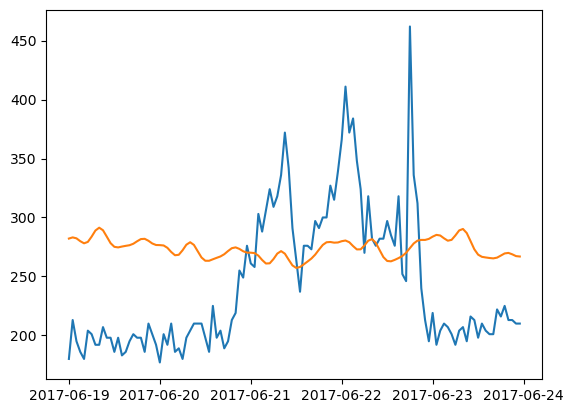

In [11]:
index = df.ds[-predict_period:]
plt.plot(index, df['y'].values[-predict_period:])
plt.plot(index, pred)

In [12]:
performance_metrics = metrics_computation(df['y'][-predict_period:], df['y'][:-predict_period].values, pred, 'Hourly')
performance = performance_metrics.compute_metrics()
pd.DataFrame(performance, index=['SMAPE', 'MASE', 'MSE', 'MAE'], columns=['prophet']).T

,SMAPE,MASE,MSE,MAE
prophet,24.15,1.2,4681.74,61.07


<h1> Summary </h1>
The prediction cannot capture the variations between the turning points. The metrics are relatively high using this method.